# Import Libraries¶

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Reading Data by using pandas

In [70]:
data = pd.read_csv('/kaggle/input/hr-comma/HR_comma_sep.csv')


### Reading first 5 rows

In [71]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Displaying the Shape of the DataFrame

In [73]:
data.shape

(14999, 10)

### Listing the Column Names of the DataFrame

In [74]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Summary of DataFrame Information

In [75]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Counting the Number of Duplicated Rows in the DataFrame

In [76]:
data.duplicated().sum()

3008

### Removing Duplicated Rows from the DataFrame

In [77]:
data=data.drop_duplicates()

### Counting the Number of Duplicated Rows in the DataFrame

In [78]:
data.duplicated().sum()

0

### Generating Descriptive Statistics for the DataFrame

In [79]:
data.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

# Details of each column separately

In [80]:

# Focus on this list because we will use it in two codes for the visualization
describe_numerical = ['satisfaction_level','last_evaluation' , 'average_montly_hours']

					>>***** satisfaction_level *****<<


count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64 



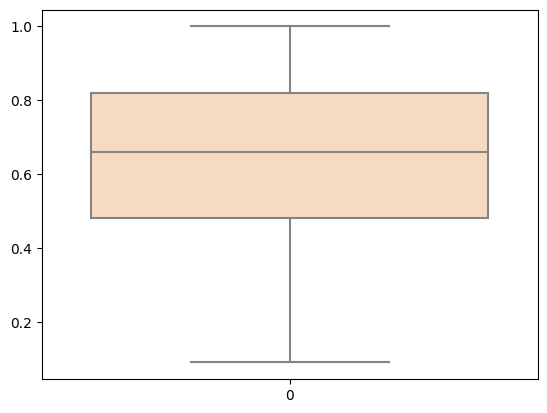

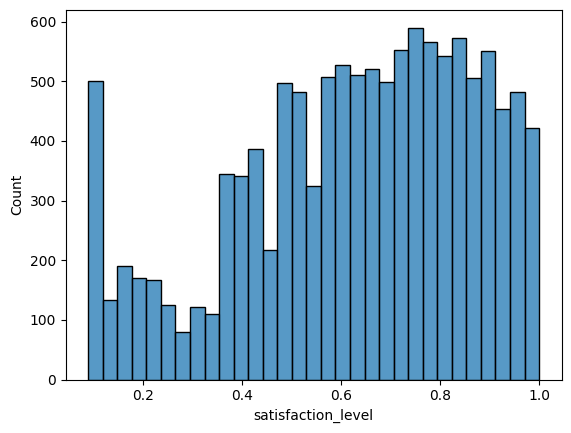

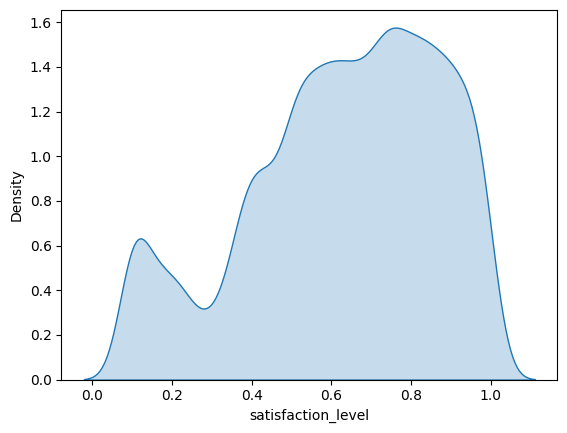






					>>***** last_evaluation *****<<


count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64 



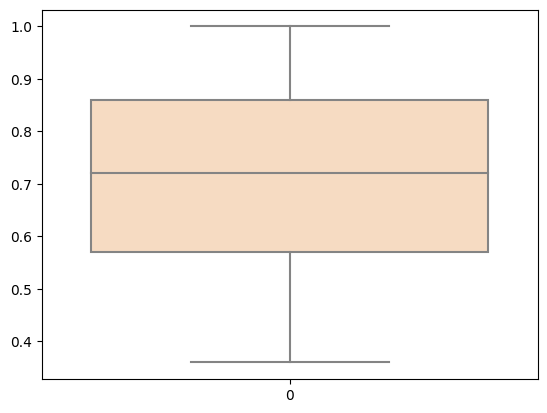

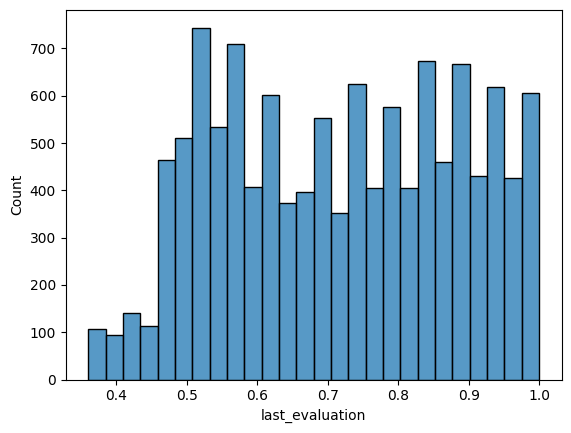

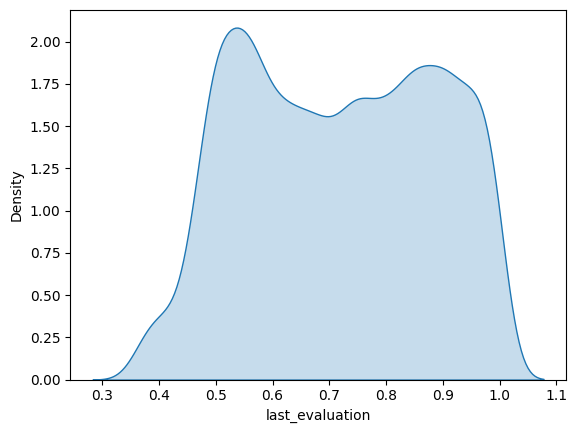






					>>***** number_project *****<<




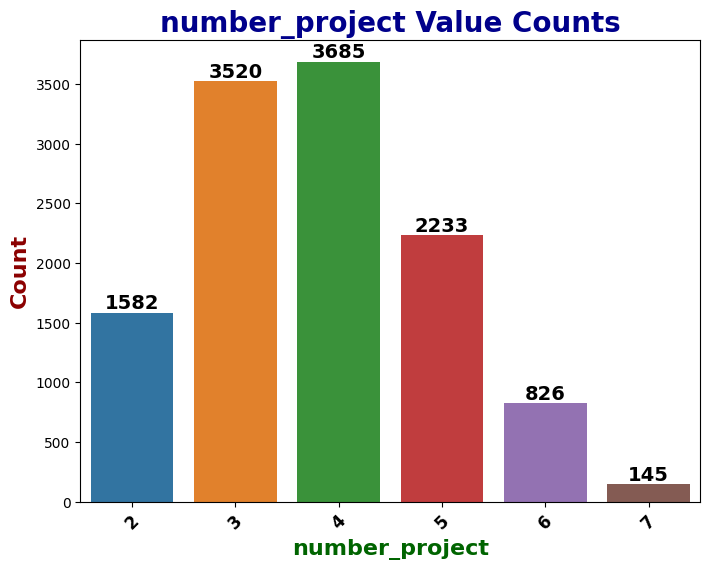






					>>***** average_montly_hours *****<<


count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64 



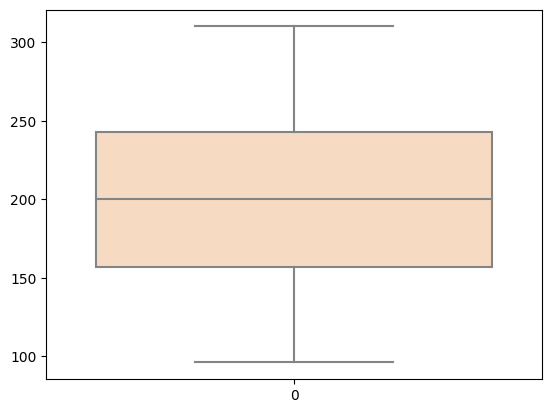

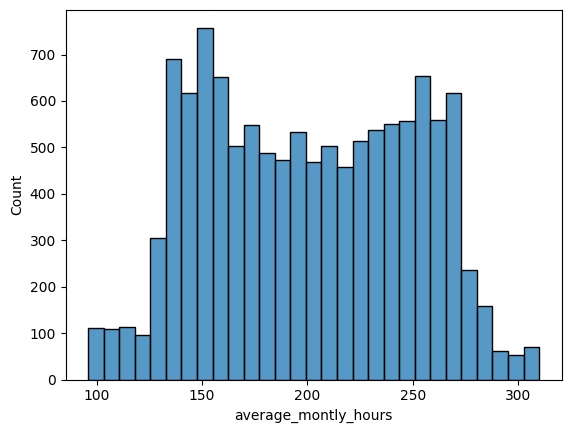

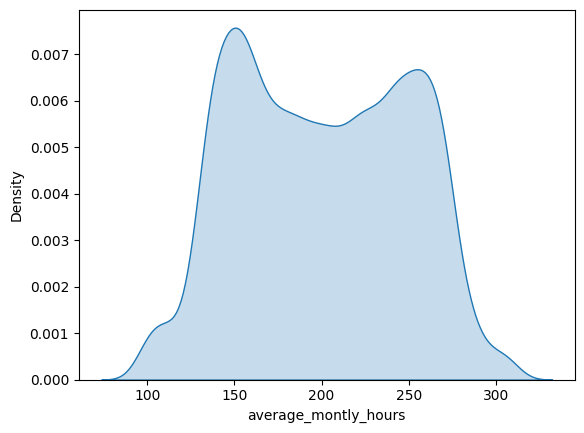






					>>***** time_spend_company *****<<




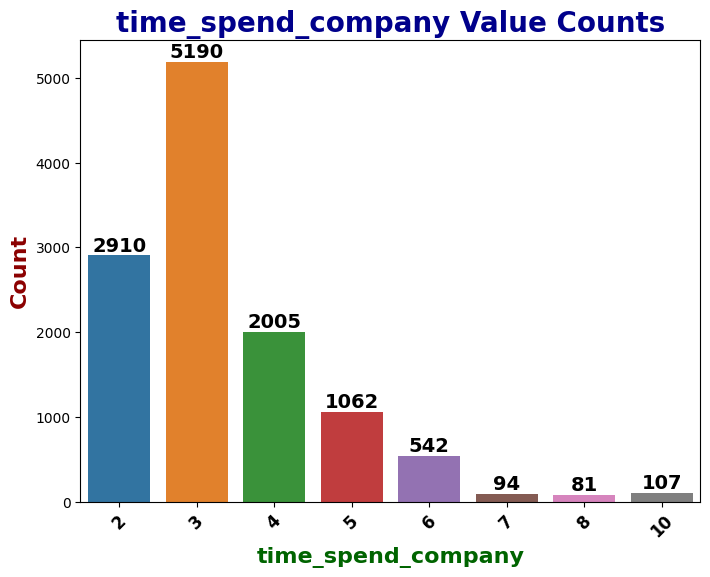






					>>***** Work_accident *****<<




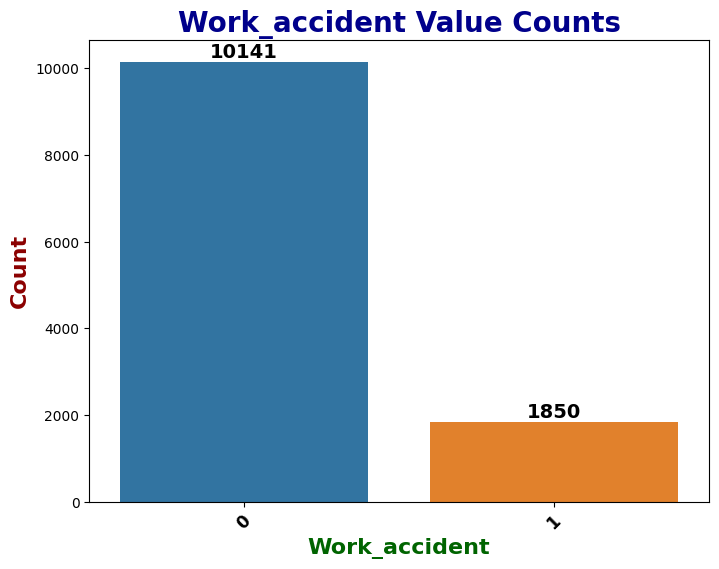






					>>***** left *****<<




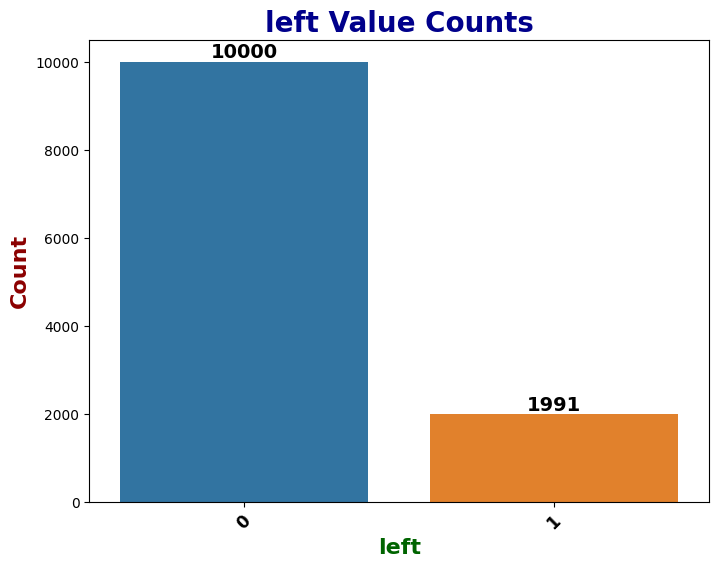






					>>***** promotion_last_5years *****<<




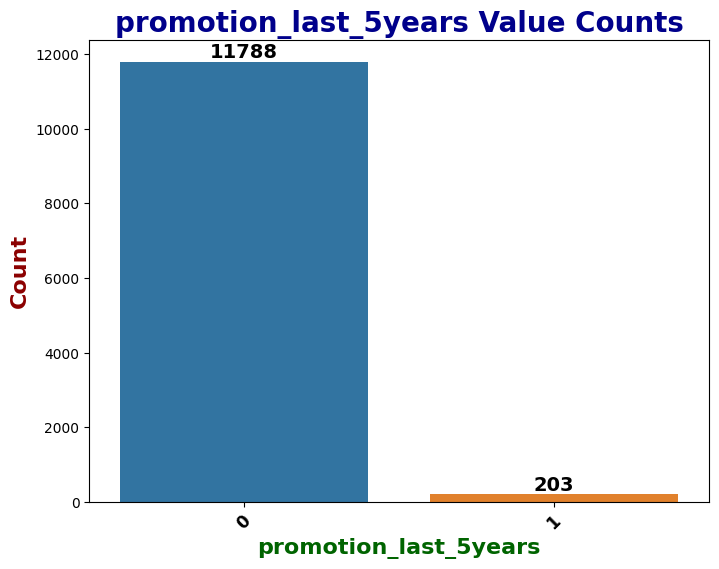






					>>***** Department *****<<




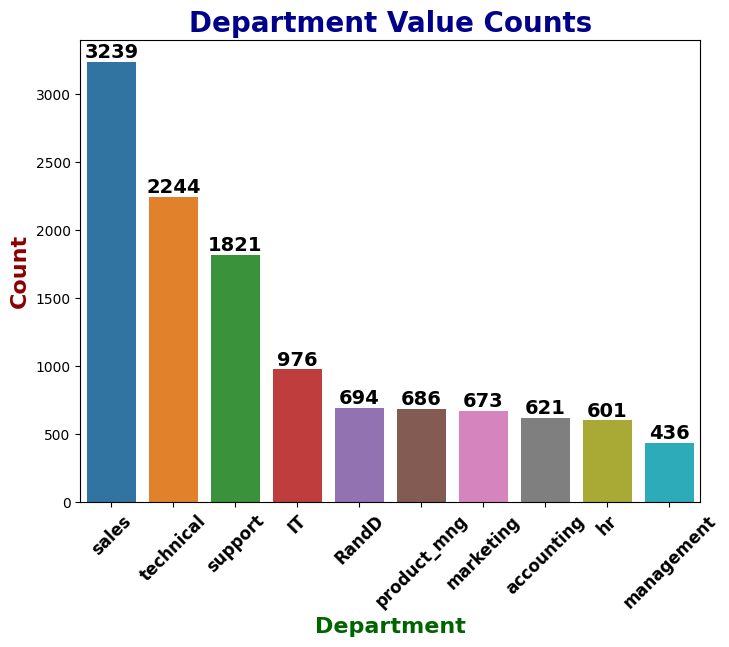






					>>***** salary *****<<




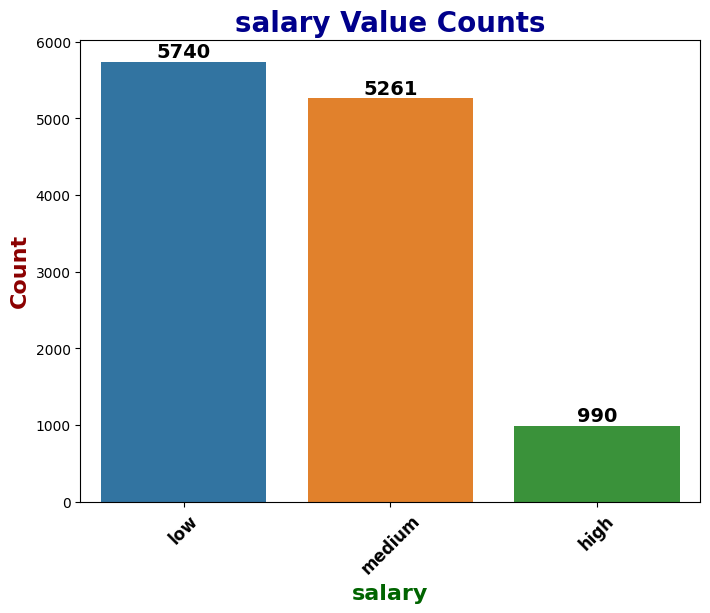

In [81]:
for i in data:
    print('\t\t\t\t\t>>***** '+i+' *****<<\n\n')
    if i in describe_numerical:
        
        # Details and illustrations
        
        print(data[i].describe(),'\n')
        sns.boxplot( data[i], color='peachpuff') 
        plt.show()
        sns.histplot(data[i])
        plt.show()
        sns.kdeplot(data[i], shade=True)
        plt.show()
        
        # Finding the outliers
        
        q75,q25= np.percentile(data[i],[75,25])
        intr_qr=q75-q25
        max=q75+(1.5*intr_qr)
        min=q25-(1.5*intr_qr)
        
        # Show outliers, if any

        if data[data[i]>max].shape[0] != 0:
            print('\n\t\t Maximum Outlire')
            display(data[data[i]>max])
        if data[data[i]<min].shape[0] != 0:
            print('\t\t Minimum Outlire')
            display(data[data[i]<min])
        
    
    else:
        plt.figure(figsize=(8, 6))
        plt.title(i+' Value Counts', fontsize=20, fontweight='bold', color='darkblue')
        
        plt.xlabel(i, fontsize=16, fontweight='bold', color='darkgreen')
        
        plt.ylabel('Count', fontsize=16, fontweight='bold', color='darkred')
        
        
        plt.xticks(rotation=45, fontsize=12, fontweight='bold')
        p = sns.barplot( x=data[i].value_counts().keys() , y=data[i].value_counts().values )
        p.bar_label(p.containers[0], fontsize=14 , fontweight='bold' );
        
        plt.show()
        
    print('\n\n\n\n')

# Compare data with each other

In [82]:
df = data.columns
for i in np.arange(0 , len(data.columns)-1 ):
    for j in np.arange(i+1 , len(data.columns)):
        print('\n\n\n\n \t\t\t\t***** The relationship between Pillar ( ',df[i],' )  and  ( ',df[j],' ) *****')
        if df[i] in describe_numerical:
            
            if df[j] in describe_numerical:
                fig = px.scatter(data ,df[i] ,df[j])
                
            else:
                group = data.groupby(df[j])
                fig = px.bar( group[df[i]].mean() , color= group.groups.keys()  )
            
            fig.show()
       
        else:
            if df[j] in describe_numerical:
                group = data.groupby(df[i])
                fig = px.bar( group[df[j]].mean() , color= group.groups.keys()  )
                
            else:
                cross =pd.crosstab(data[df[i]],data[df[j]])
                fig = px.bar( cross )
            
            fig.show()





 				***** The relationship between Pillar (  satisfaction_level  )  and  (  last_evaluation  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  number_project  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  average_montly_hours  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  time_spend_company  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  Work_accident  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  left  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  promotion_last_5years  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  satisfaction_level  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  number_project  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  average_montly_hours  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  time_spend_company  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  Work_accident  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  left  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  promotion_last_5years  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  last_evaluation  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  number_project  )  and  (  average_montly_hours  ) *****






 				***** The relationship between Pillar (  number_project  )  and  (  time_spend_company  ) *****






 				***** The relationship between Pillar (  number_project  )  and  (  Work_accident  ) *****






 				***** The relationship between Pillar (  number_project  )  and  (  left  ) *****






 				***** The relationship between Pillar (  number_project  )  and  (  promotion_last_5years  ) *****






 				***** The relationship between Pillar (  number_project  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  number_project  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  average_montly_hours  )  and  (  time_spend_company  ) *****






 				***** The relationship between Pillar (  average_montly_hours  )  and  (  Work_accident  ) *****






 				***** The relationship between Pillar (  average_montly_hours  )  and  (  left  ) *****






 				***** The relationship between Pillar (  average_montly_hours  )  and  (  promotion_last_5years  ) *****






 				***** The relationship between Pillar (  average_montly_hours  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  average_montly_hours  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  time_spend_company  )  and  (  Work_accident  ) *****






 				***** The relationship between Pillar (  time_spend_company  )  and  (  left  ) *****






 				***** The relationship between Pillar (  time_spend_company  )  and  (  promotion_last_5years  ) *****






 				***** The relationship between Pillar (  time_spend_company  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  time_spend_company  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  Work_accident  )  and  (  left  ) *****






 				***** The relationship between Pillar (  Work_accident  )  and  (  promotion_last_5years  ) *****






 				***** The relationship between Pillar (  Work_accident  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  Work_accident  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  left  )  and  (  promotion_last_5years  ) *****






 				***** The relationship between Pillar (  left  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  left  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  promotion_last_5years  )  and  (  Department  ) *****






 				***** The relationship between Pillar (  promotion_last_5years  )  and  (  salary  ) *****






 				***** The relationship between Pillar (  Department  )  and  (  salary  ) *****


# Data Cleaning

In [83]:
Department_dummies = pd.get_dummies(data.Department)
salary_dummies = pd.get_dummies(data.salary)

display(Department_dummies)
display(salary_dummies)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,True,False,False,False,False,False
11996,False,False,False,False,True,False,False,False,False,False
11997,False,False,False,False,True,False,False,False,False,False
11998,False,False,False,False,False,True,False,False,False,False


,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
11995,True,False,False
11996,True,False,False
11997,True,False,False
11998,True,False,False


In [84]:
Department_dummies =Department_dummies.replace({ True:1 , False:0})
salary_dummies =salary_dummies.replace({ True:1 , False:0})

In [85]:
merged = pd.concat([data , Department_dummies,salary_dummies] ,axis=1)
merged.drop(['Department','salary'] , axis=1 , inplace=True)

In [86]:
merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


# Create Model

In [87]:
X_train, X_test, y_train, y_test = train_test_split( merged.drop('left',axis=1) , merged.left , train_size=0.8)

# Logistic Regression Model

In [88]:
model = LogisticRegression(max_iter=100)
model.fit(X_train , y_train) 

LogisticRegression()

In [89]:
model.score(X_train , y_train)

0.8318390325271059

In [90]:
model.score(X_test, y_test)

0.8270112546894539

In [91]:
model.coef_

array([[-3.81387566,  0.17610456, -0.26383245,  0.00415405,  0.34160931,
        -1.45800868, -0.42320099, -0.1539005 , -0.43117507,  0.00506355,
         0.02745998, -0.30342701, -0.1184324 , -0.05893609,  0.00568131,
         0.17412023,  0.1107772 , -1.40170457,  0.57822658,  0.08070919]])

In [92]:
model.intercept_

array([-0.76908638])

# Random Forest Classifier Model

In [93]:
RandomForestClassifierModel = RandomForestClassifier()
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
RandomForestClassifierModel.score(X_train , y_train)

1.0

In [95]:
RandomForestClassifierModel.score(X_test, y_test)

0.9808253438932889

In [96]:
p = RandomForestClassifierModel.predict(X_test)

In [97]:
accuracy_score(p , y_test)

0.9808253438932889